### Special Sampling Distributions

### Long Tail Distributions

In [1]:
from scipy.stats import norm   # Imports the normal distribution
from scipy.stats import probplot as qqplot  # Imports the qqplot, named probplot in scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sp500 = pd.read_csv('Data/sp500_data.csv')
nonzero = (sp500['NFLX'] != 0).idxmax(1) # first non=zero index
netflix = sp500.iloc[nonzero:]['NFLX']
isleast3 = np.abs(netflix)<3
netflix = netflix[isleast3]

In [3]:
netflix_mean = netflix.mean()
netflix_std = netflix.std(ddof=1)
netflix_count = netflix.count()
netflix_mean, netflix_std, netflix_count

(0.008956962458835297, 0.48449682250363346, 3292)

In [4]:
normal_dist = norm.rvs(loc = netflix_mean, scale = netflix_std, size=netflix_count)
#plt.hist(normal_dist, bins = 100)
normal_dist.sort()

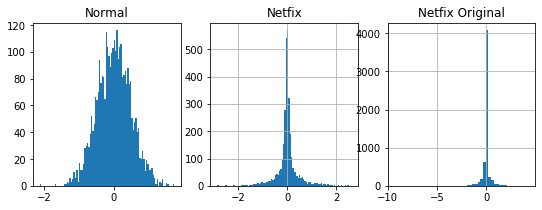

In [7]:
fig1 = plt.figure(figsize=(9,3))
ax1 = plt.subplot(131)
_ = plt.hist(normal_dist,bins=100,density=False)
#_ = ax1.axis([-2,2,0,4])
_ = ax1.set_title('Normal')
ax2 = plt.subplot(132)
_ = netflix.hist(bins=100,density=False)

_ = ax2.set_title('Netfix')
ax3 = plt.subplot(133)
_ = sp500['NFLX'].sort_values().hist(bins=50,density=False)
_ = ax3.set_title('Netfix Original')

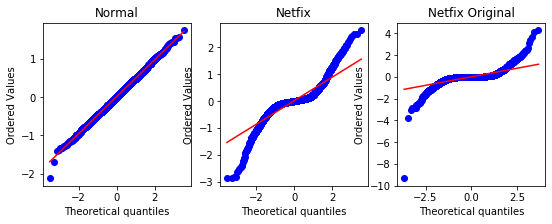

In [9]:
fig2 = plt.figure(figsize=(9,3))
ax4 = plt.subplot(131)
normal_qqplot = qqplot(normal_dist, plot =plt)
_ = ax4.set_title('Normal')
ax5 = plt.subplot(132)
netflix_qqplot = qqplot(netflix, plot=plt)
_ = ax5.set_title('Netfix')
ax6 = plt.subplot(133)
netflix_qqplot = qqplot(sp500['NFLX'], plot=plt)
_ = ax6.set_title('Netfix Original')

**QQ-Plot**: A plot to visualize how close a sample distribution is to a normal distribution.

#### Student's T Distribution

\begin{equation*}
f_T(t)=\dfrac{\Gamma(\frac{\nu +1}{2})}{\sqrt{\pi \nu}\Gamma(\frac{\nu}{2}){(1 + t^2/\nu)}^{\frac{(\nu+1)}{2}}} 
\end{equation*}

Wherem $\Gamma$ is the Gamma function $\Gamma(\alpha)=(\alpha-1)!$


- The $t(\nu)$ pdf is continuous and symmetric about zero
- when compared to the $N(0,1)$ pdf, the $t(\nu)$ pdf is less peaked in the center and has more probability in the tails (i.e., leptokurtic)

- as $\nu$ increases, the $t(\nu)$ pdf looks more and more like the $N(0,1)$ pdf. 

- the sequence of $t(\nu)$ pdfs (in $\nu$) converges pointwise to the $N(0,1)$ pdf as $\nu \rightarrow \infty$.

- the cdf does not exist in closed form for general $\nu$

Terminology:
*degrees of freedom*: A parameter that allows the $t$-distribution to adjust to different sample sizes, statistics, and number of groups

In code: 
``` python
df 
```
(from: 'degrees of freedom') 


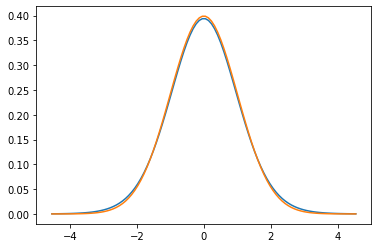

In [12]:
import numpy as np
from scipy.stats import t      # Imports the Student's t distribution
from scipy.stats import norm   # Imports the normal distribution
import matplotlib.pyplot as plt
%matplotlib inline

rv = t(df=20, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
nd = norm.pdf(x)
y = rv.pdf(x) 

plt.xlim(-5,5)
plt.plot(x,y)
plt.plot(x,nd)

Application: Suppose $Y_1, Y_2, \ldots, Y_n$ is an iid sample from a $N(\mu, \sigma^2)$
population distribution. We already know

\begin{equation*}
Z=\dfrac{Y -\mu}{\sigma/\sqrt{n}} \sim N(0,1)
\end{equation*}


If we replace the population standard deviation $\sigma$ above with the sample standard deviation
$S=\sqrt{S^2}$, then the new quantity

\begin{equation*}
T=\dfrac{Y -\mu}{S/\sqrt{n}} \sim t(n-1)
\end{equation*}



*References*
1. Mathematical Statistics with Applications by Richard L. Scheaffer, William Mendenhall and Dennis Wackerly, 2007
2. Practical Statistics for Data Scientists: 50 Essential Concepts by Peter Bruce